In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hospital = pd.read_csv(r'C:\Users\User\PythonProject\covid19-public\epidemic\hospital.csv')
icu = pd.read_csv(r'C:\Users\User\PythonProject\covid19-public\epidemic\icu.csv')

In [3]:
data = pd.merge(hospital,icu,on='date',how='inner')

In [4]:
data.columns

Index(['date', 'state_x', 'beds', 'beds_covid', 'beds_noncrit', 'admitted_pui',
       'admitted_covid', 'admitted_total', 'discharged_pui',
       'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_pui',
       'hosp_noncovid', 'state_y', 'beds_icu', 'beds_icu_rep',
       'beds_icu_total', 'beds_icu_covid', 'vent', 'vent_port', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_noncovid'],
      dtype='object')

In [5]:
data.isnull().sum()

date                0
state_x             0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
state_y             0
beds_icu            0
beds_icu_rep        0
beds_icu_total      0
beds_icu_covid      0
vent                0
vent_port           0
icu_covid           0
icu_pui             0
icu_noncovid        0
vent_covid          0
vent_pui            0
vent_noncovid       0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])
mask = (data['date'] > '2021-02-24') & (data['date'] <= '2021-08-17')
data1 = data.loc[mask]

In [7]:
data1 = data1.groupby(['date'])['admitted_total','icu_covid','vent_covid'].sum()


<ipython-input-7-7cefe4072aa9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1 = data1.groupby(['date'])['admitted_total','icu_covid','vent_covid'].sum()


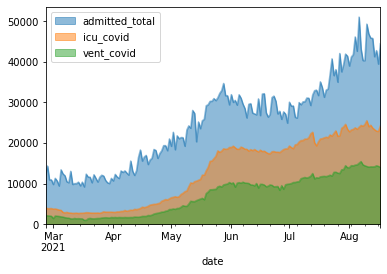

In [8]:
ax = data1.plot.area(stacked=False)

In [9]:
population = pd.read_csv(r'C:\Users\User\PythonProject\citf-public\static\population.csv')
vaccination = pd.read_csv(r'C:\Users\User\PythonProject\citf-public\vaccination\vax_malaysia.csv')

In [10]:
vaccination.head()

,date,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,pending
0,2021-02-24,60,0,60,60,0,60,60,0,0,0,0,0,0
1,2021-02-25,1145,0,1145,1205,0,1205,1145,0,0,0,0,0,0
2,2021-02-26,4096,0,4096,5301,0,5301,4096,0,0,0,0,0,0
3,2021-02-27,6716,0,6716,12017,0,12017,6716,0,0,0,0,0,0
4,2021-02-28,6701,3,6704,18718,3,18721,6701,3,0,0,0,0,0


In [11]:
population.head()

,state,idxs,pop,pop_18,pop_60
0,Malaysia,0,32657400,23409600,3502000
1,Johor,1,3781000,2711900,428700
2,Kedah,2,2185100,1540600,272500
3,Kelantan,3,1906700,1236200,194100
4,Melaka,4,932700,677400,118500


In [12]:
data1[['avg_total','avg_icu','avg_vent']] = data1[['admitted_total','icu_covid','vent_covid']].rolling(window=7).mean()
data1 = data1.dropna()

In [13]:
data1.head(10)

,admitted_total,icu_covid,vent_covid,avg_total,avg_icu,avg_vent
date,,,,,,
2021-03-03,10650,3645,1980,11436.428571,3827.142857,1941.428571
2021-03-04,9420,3495,1920,11044.285714,3739.285714,1911.428571
2021-03-05,13395,3435,1815,10911.428571,3683.571429,1875.000000
2021-03-06,12375,2910,1755,11119.285714,3548.571429,1836.428571
2021-03-07,11955,2820,1620,11267.142857,3398.571429,1787.142857
2021-03-08,10440,2925,1530,11361.428571,3285.000000,1806.428571
2021-03-09,10230,2775,1500,11209.285714,3143.571429,1731.428571
2021-03-10,13020,2760,1320,11547.857143,3017.142857,1637.142857
2021-03-11,9795,2685,1305,11601.428571,2901.428571,1549.285714


In [14]:
data1[['avg_total','avg_icu','avg_vent']] = data1[['avg_total','avg_icu','avg_vent']].astype(int)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
data1.tail()

,admitted_total,icu_covid,vent_covid,avg_total,avg_icu,avg_vent
date,,,,,,
2021-08-13,45760,23696,14112,44500,24377,14418
2021-08-14,41248,23280,14144,44224,24226,14235
2021-08-15,42752,22912,14400,44573,24050,14205
2021-08-16,39440,22880,14240,44448,23810,14185
2021-08-17,44448,24240,14032,43760,23632,14160


In [16]:
data1 = data1[['avg_total','avg_icu','avg_vent']]

In [17]:
population = population.iloc[0,2]

In [18]:
vaccination = vaccination[['date','cumul_partial']]
vaccination['date'] = pd.to_datetime(vaccination['date'])
vaccination.set_index('date', inplace=True)

In [19]:
vaccination['percent'] = (vaccination['cumul_partial']/population)*100

In [20]:
vaccination = vaccination.shift(+14, freq='D')

In [21]:
vaccination

,cumul_partial,percent
date,,
2021-03-10,60,0.000184
2021-03-11,1205,0.003690
2021-03-12,5301,0.016232
2021-03-13,12017,0.036797
2021-03-14,18718,0.057316
...,...,...
2021-08-27,16771586,51.356158
2021-08-28,16932769,51.849716
2021-08-29,17076440,52.289650


In [22]:
data2 = pd.merge(data1,vaccination, on='date',how='inner')

In [23]:
data2

,avg_total,avg_icu,avg_vent,cumul_partial,percent
date,,,,,
2021-03-10,11547,3017,1637,60,0.000184
2021-03-11,11601,2901,1549,1205,0.003690
2021-03-12,11117,2796,1493,5301,0.016232
2021-03-13,10778,2772,1433,12017,0.036797
2021-03-14,10551,2749,1399,18718,0.057316
...,...,...,...,...,...
2021-08-13,44500,24377,14418,13721596,42.016805
2021-08-14,44224,24226,14235,14047937,43.016091
2021-08-15,44573,24050,14205,14352198,43.947767


In [26]:
data2.to_csv('crit-vaccination.csv', sep='\t')

<AxesSubplot:>

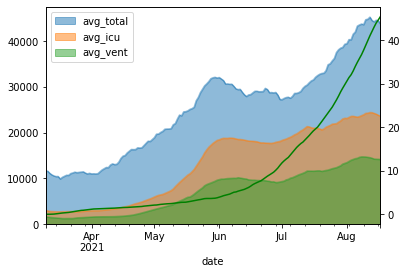

In [28]:
ax= data2[['avg_total','avg_icu','avg_vent']].plot(kind='area',stacked=False)
data2['percent'].plot(secondary_y=True, style='g')
